In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

In [3]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
Spotify = pd.read_csv('/Users/Camer/Downloads/Spring 2025 Classes/Stat 411/Projects/Project 2/Datasets/data.csv')
Spotify.head(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
Spotify.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [6]:
Spotify.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [7]:
# Find indices where popularity is zero
indices_to_drop = Spotify[Spotify['popularity'] == 0].index

# Drop those rows
Spotify.drop(indices_to_drop, inplace=True)

In [8]:
Spotify.shape

(142761, 19)

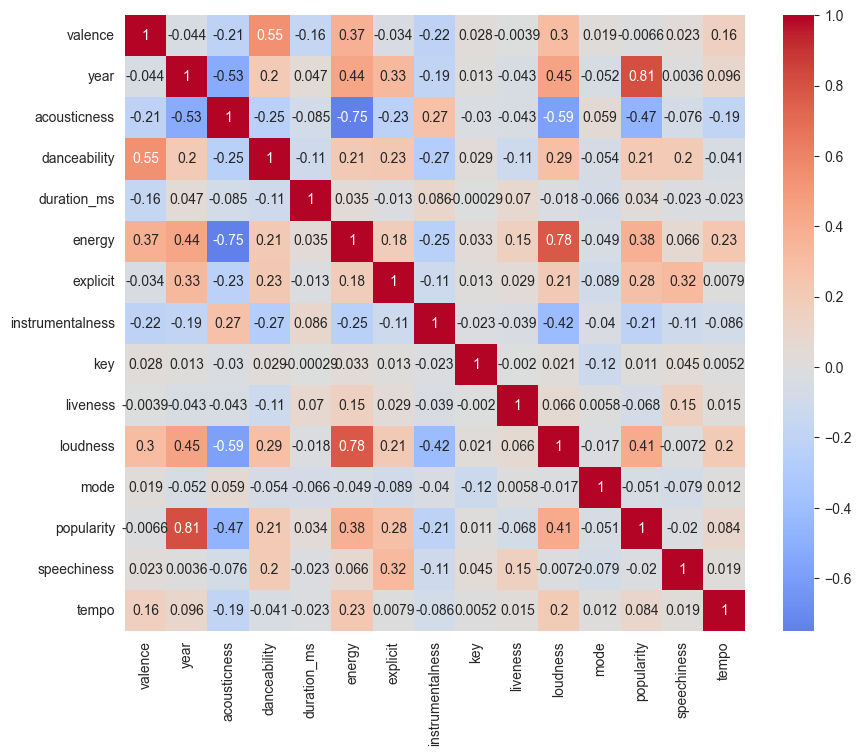

In [9]:
Spotify_subset = Spotify.drop(columns = ['artists', 'name', 'release_date', 'id'])

corr_matrix = Spotify_subset.corr()

plt.figure(figsize = (10, 8))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', center = 0)

plt.show()

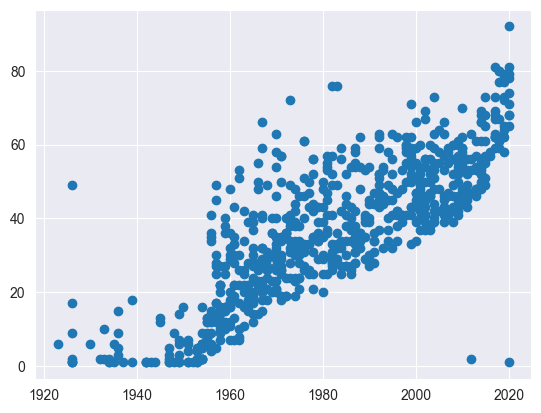

In [10]:
Spotify_sample = Spotify_subset.sample(frac = 0.005, random_state = 0)
X = Spotify_sample['year']
y = Spotify_sample['popularity']
plt.scatter(X, y)
plt.show()

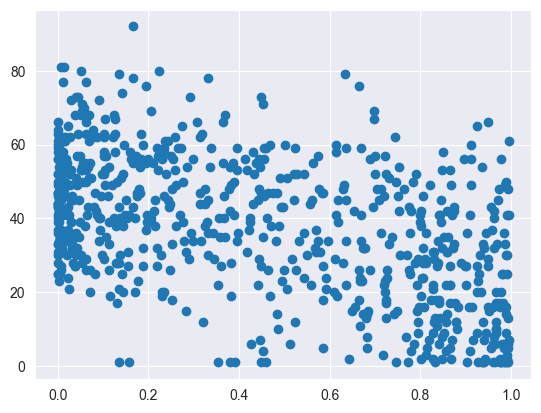

In [11]:
plt.show()
Spotify_sample = Spotify_subset.sample(frac=0.005, random_state=0)
X = Spotify_sample['acousticness']
y = Spotify_sample['popularity']
plt.scatter(X, y)
plt.show()

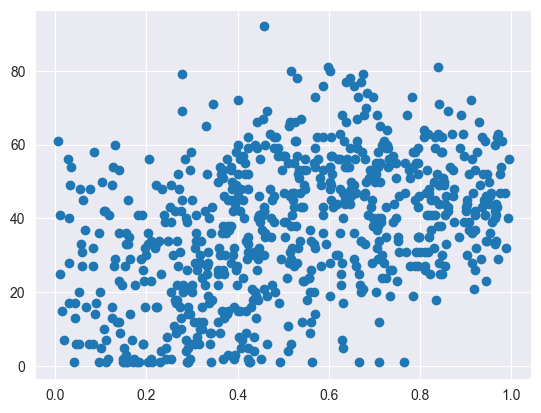

In [12]:
plt.show()
Spotify_sample = Spotify_subset.sample(frac=0.005, random_state=0)
X = Spotify_sample['energy']
y = Spotify_sample['popularity']
plt.scatter(X, y)
plt.show()

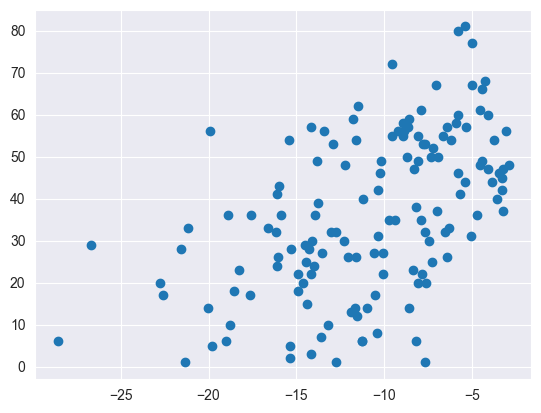

In [13]:
plt.show()
Spotify_sample = Spotify_subset.sample(frac=0.001, random_state=0)
X = Spotify_sample['loudness']
y = Spotify_sample['popularity']
plt.scatter(X, y)
plt.show()

# Building a multiple linear regression model

In [14]:
Spotify_subset.columns

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')

In [15]:
predictors = ['valence',
              'year',
              'acousticness',
              'danceability',
              'duration_ms',
              'energy',
              'instrumentalness',
              'key',
              'liveness',
              'loudness',
              'mode',
              'speechiness',
              'tempo']
X = Spotify[predictors]
y = Spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 0)
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

y_pred = lm.predict(X_test)
print("=== scikit‑learn LinearRegression ===")
print(f"Intercept: {lm.intercept_:.3f}")
print("Coefficients:")
for feat, coef in zip(predictors, lm.coef_):
    print(f"  {feat:15s}: {coef:.3f}")
print(f"R² on test set:      {r2_score(y_test, y_pred):.3f}")
print(f"Mean squared error:  {mean_squared_error(y_test, y_pred):.3f}\n")

=== scikit‑learn LinearRegression ===
Intercept: -1230.970
Coefficients:
  valence        : -0.479
  year           : 0.641
  acousticness   : -2.523
  danceability   : 3.510
  duration_ms    : 0.000
  energy         : -2.317
  instrumentalness: -2.745
  key            : -0.009
  liveness       : -2.761
  loudness       : 0.112
  mode           : -0.463
  speechiness    : -5.427
  tempo          : 0.000
R² on test set:      0.675
Mean squared error:  111.761



In [16]:
X2 = sm.add_constant(X)
ols_model = sm.OLS(y, X2).fit()
print("=== statsmodels OLS Summary ===")
print(ols_model.summary())

=== statsmodels OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 2.247e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        19:02:56   Log-Likelihood:            -5.3887e+05
No. Observations:              142761   AIC:                         1.078e+06
Df Residuals:                  142747   BIC:                         1.078e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const   

Our first linear model has an average mean squared error of 111.761 which is fairly good for our first model, this means on average we are off by about 11.  We also got a R squared value of 0.675 which means our model explains roughly 67% of the variance in our dataset, which is not too bad for our first model.  Next up we will build a model using the predictors that have a higher correlation with popularity to see if any of them fit better.

In [17]:
predictors = ['year',
              'acousticness',
              'danceability',
              'energy',
              'instrumentalness',
              'liveness',
              'loudness',
              'mode',
              'speechiness',]
X = Spotify[predictors]
y = Spotify['popularity']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 0)
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

y_pred = lm.predict(X_test)
print("=== scikit‑learn LinearRegression ===")
print(f"Intercept: {lm.intercept_:.3f}")
print("Coefficients:")
for feat, coef in zip(predictors, lm.coef_):
    print(f"  {feat:15s}: {coef:.3f}")
print(f"R² on test set:      {r2_score(y_test, y_pred):.3f}")
print(f"Mean squared error:  {mean_squared_error(y_test, y_pred):.3f}\n")

=== scikit‑learn LinearRegression ===
Intercept: -1234.176
Coefficients:
  year           : 0.643
  acousticness   : -2.600
  danceability   : 3.064
  energy         : -2.597
  instrumentalness: -2.691
  liveness       : -2.730
  loudness       : 0.115
  mode           : -0.473
  speechiness    : -5.311
R² on test set:      0.675
Mean squared error:  111.757



In [18]:
X2 = sm.add_constant(X)
ols_model = sm.OLS(y, X2).fit()
print("=== statsmodels OLS Summary ===")
print(ols_model.summary())

=== statsmodels OLS Summary ===
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 3.245e+04
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        19:02:57   Log-Likelihood:            -5.3887e+05
No. Observations:              142761   AIC:                         1.078e+06
Df Residuals:                  142751   BIC:                         1.078e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const   

Our model with only the predictors that were more correlated with our response variable popularity was almost exactly as accurate as our first model, but the MSE was actually a tiny bit higher. Overall this model is not better than our first model.

# Building a model using hyrbid stepwise selection

In [48]:
def hybrid_stepwise_cv(X: pd.DataFrame,
                       y: pd.Series,
                       initial_list: list = None,
                       cv_splits: int = 5,
                       scoring: str = 'neg_mean_squared_error',
                       verbose: bool = True):
    """
    Hybrid (forward+backward) stepwise feature selection
    using cross‑validation to evaluate test error.

    Parameters:
    - X: predictors DataFrame
    - y: response Series
    - initial_list: features to start with (default: empty)
    - cv_splits: number of CV folds
    - scoring: any sklearn scoring (e.g. 'r2' or 'neg_mean_squared_error')
    - verbose: print each add/drop step

    Returns:
    - included: list of selected feature names
    """
    included = list(initial_list) if initial_list else []
    # Set up CV splitter for reproducible folds
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=1)

    # Evaluate a given set of columns
    def cv_score(cols):
        model = LinearRegression()
        scores = cross_val_score(model, X[cols], y, cv=cv, scoring=scoring)
        return scores.mean()

    # Initialize current best score
    current_score = -np.inf if scoring.startswith('r2') else -np.inf
    # (for neg MSE we also maximize the negative error, same logic)

    while True:
        changed = False
        # ---- Forward step ----
        excluded = list(set(X.columns) - set(included))
        forward_candidates = {}
        for var in excluded:
            score = cv_score(included + [var])
            forward_candidates[var] = score
        if forward_candidates:
            best_var, best_var_score = max(forward_candidates.items(), key=lambda x: x[1])
            if best_var_score > current_score:
                included.append(best_var)
                current_score = best_var_score
                changed = True
                if verbose:
                    print(f"Add  {best_var:20s} → CV score: {best_var_score:.4f}")

        # ---- Backward step ----
        if included:
            backward_candidates = {}
            for var in included:
                trial = [v for v in included if v != var]
                if not trial:
                    continue
                score = cv_score(trial)
                backward_candidates[var] = score
            if backward_candidates:
                worst_var, worst_var_score = max(backward_candidates.items(), key=lambda x: x[1])
                if worst_var_score > current_score:
                    included.remove(worst_var)
                    current_score = worst_var_score
                    changed = True
                    if verbose:
                        print(f"Drop {worst_var:20s} → CV score: {worst_var_score:.4f}")

        if not changed:
            break

    return included

# ----------------------------
# Example usage on your Spotify data:
# ----------------------------

# 1. Define all candidate predictors
all_preds = ['valence',
              'year',
              'acousticness',
              'danceability',
              'duration_ms',
              'energy',
              'instrumentalness',
              'key',
              'liveness',
              'loudness',
              'mode',
              'speechiness',
              'tempo']
X = Spotify[all_preds]
y = Spotify['popularity']

# 2. Run the hybrid stepwise CV selector
selected_features = hybrid_stepwise_cv(
    X, y,
    initial_list=[],
    cv_splits=5,
    scoring='neg_mean_squared_error',
    verbose=True
)

print("\nSelected features:", selected_features)

# 3. Fit a final model and evaluate on a hold‑out test set
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y,
    test_size=0.2, random_state=42)

final_model = LinearRegression().fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f"Test  R²: {r2_score(y_test, y_pred):.3f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred):.3f}")

chosen_preds = [
    'year',
    'instrumentalness',
    'liveness',
    'acousticness',
    'speechiness',
    'danceability',
    'mode',
    'loudness',
    'energy',
    'valence',
    'tempo'
]

# coefficients in order of selected_vars
coef_series = pd.Series(final_model.coef_, index = chosen_preds)

print("Intercept:", final_model.intercept_)
print("Coefficients:")
print(coef_series)

Add  year                 → CV score: -113.8100
Add  instrumentalness     → CV score: -112.7598
Add  liveness             → CV score: -112.3286
Add  acousticness         → CV score: -111.9284
Add  speechiness          → CV score: -111.6890
Add  danceability         → CV score: -111.4062
Add  mode                 → CV score: -111.3677
Add  loudness             → CV score: -111.3417
Add  energy               → CV score: -111.2301
Add  valence              → CV score: -111.2239
Add  tempo                → CV score: -111.2235

Selected features: ['year', 'instrumentalness', 'liveness', 'acousticness', 'speechiness', 'danceability', 'mode', 'loudness', 'energy', 'valence', 'tempo']
Test  R²: 0.674
Test MSE: 111.678
Intercept: -1228.224976510115
Coefficients:
year                0.639937
instrumentalness   -2.781372
liveness           -2.779261
acousticness       -2.571927
speechiness        -5.345159
danceability        3.709696
mode               -0.497755
loudness            0.116631
ener

In [49]:
# 1. Pick a single test‐set row by position (e.g. the very first test sample)
sample_pos = 0
X_single   = X_test.iloc[[sample_pos]]    # double brackets → keeps it as a DataFrame (1×p)
y_actual   = y_test.iloc[sample_pos]      # the true popularity score

# 2. Run your model’s .predict on that 1×p DataFrame
y_pred     = final_model.predict(X_single)[0]   # [0] to pull out the scalar

# 3. Print them side‐by‐side (and the difference)
print(f"Test sample #{sample_pos}:")
print(f"  • Actual popularity   = {y_actual:.2f}")
print(f"  • Predicted popularity= {y_pred:.2f}")
print(f"  • Error (actual–pred)  = {y_actual - y_pred:.2f}")

Test sample #0:
  • Actual popularity   = 48.00
  • Predicted popularity= 53.85
  • Error (actual–pred)  = -5.85


Our model built using hybrid stepwise selection ended up selecting variables very similar to the model we built before using the predictors we found to be most correlated with popularity with low p-values.  Our model ended up having a slightly lower test MSE and test R-squared which means it is probably not much better than our model we built in earlier steps.

Model expects features in this order: ['year', 'instrumentalness', 'liveness', 'acousticness', 'speechiness', 'danceability', 'mode', 'loudness', 'energy', 'valence', 'tempo']


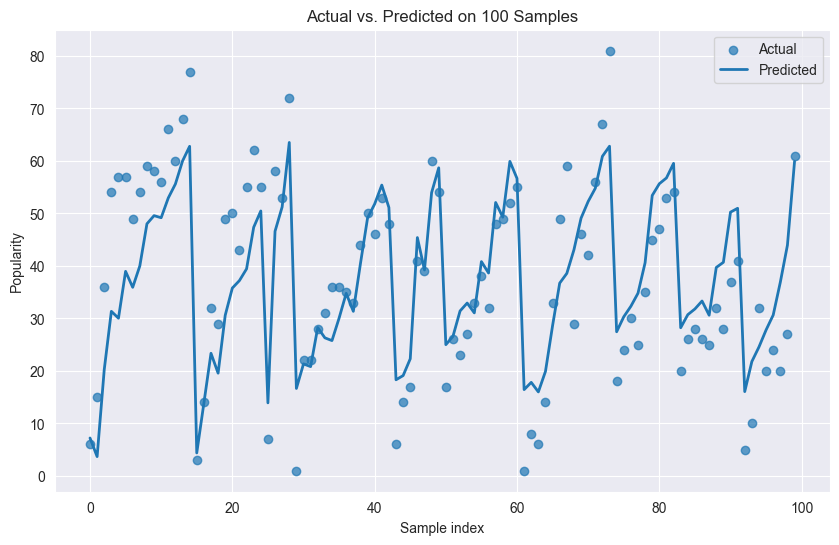

In [20]:
# 1. Sample N rows and sort by index
N = 100
sample_df = Spotify.sample(n = N, random_state = 0).sort_index()

# 2. Pull the exact feature order the model expects
#    (works in sklearn ≥1.0)
feature_order = list(final_model.feature_names_in_)
print("Model expects features in this order:", feature_order)

# 3. Slice your sample_df in that exact order
X_samp = sample_df[feature_order]

# 4. Predict
y_true = sample_df['popularity']
y_pred = final_model.predict(X_samp)

# 5. Plot
plt.figure(figsize=(10,6))
x = range(len(sample_df))
plt.scatter(x, y_true, label='Actual', alpha=0.7)
plt.plot(x, y_pred, label='Predicted', linewidth=2)
plt.xlabel('Sample index')
plt.ylabel('Popularity')
plt.title(f'Actual vs. Predicted on {N} Samples')
plt.legend()
plt.show()

In [21]:
print("Number of features in X:", X.shape[1])
print("Length of coef_ array:", len(final_model.coef_))
print("Your index list length:", len(all_preds))

Number of features in X: 13
Length of coef_ array: 11
Your index list length: 13



Distribution of popularity categories:
popularity_category
average      77853
unpopular    63172
popular       1736
Name: count, dtype: int64


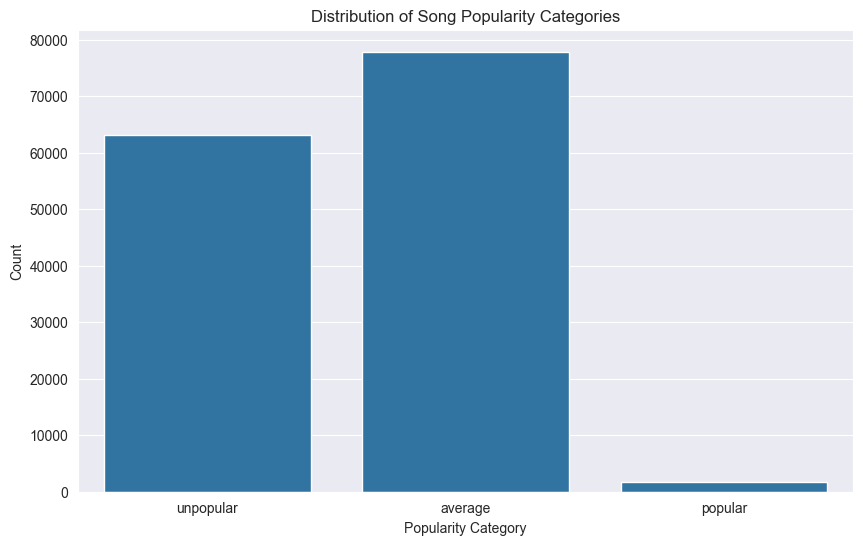

In [22]:
# Create popularity categories
Spotify['popularity_category'] = pd.cut(Spotify['popularity'],
                                      bins=[-float('inf'), 35, 75, float('inf')],
                                      labels=['unpopular', 'average', 'popular'])

# Display the distribution of the categories
print("\nDistribution of popularity categories:")
print(Spotify['popularity_category'].value_counts())

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Spotify, x='popularity_category')
plt.title('Distribution of Song Popularity Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.show()


Distribution of popularity categories:
popularity_category
poor        51160
average     49189
terrible    26512
good        15351
elite         549
Name: count, dtype: int64


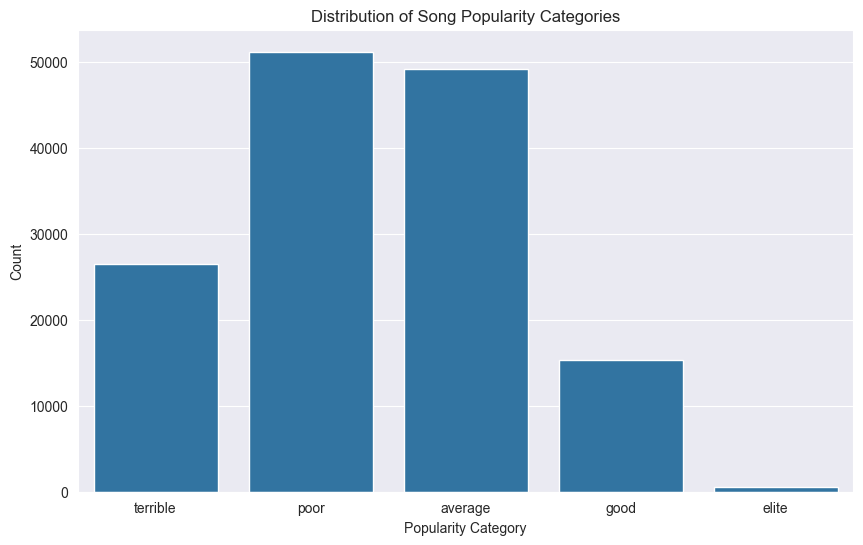

In [23]:
# Create popularity categories
Spotify['popularity_category'] = pd.cut(Spotify['popularity'],
                                      bins=[-float('inf'), 20, 40, 60, 80, float('inf')],
                                      labels=['terrible', 'poor', 'average', 'good', 'elite'])

# Display the distribution of the categories
print("\nDistribution of popularity categories:")
print(Spotify['popularity_category'].value_counts())

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Spotify, x='popularity_category')
plt.title('Distribution of Song Popularity Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.show()


Distribution of popularity categories:
popularity_category
unpopular    141025
popular        1736
Name: count, dtype: int64


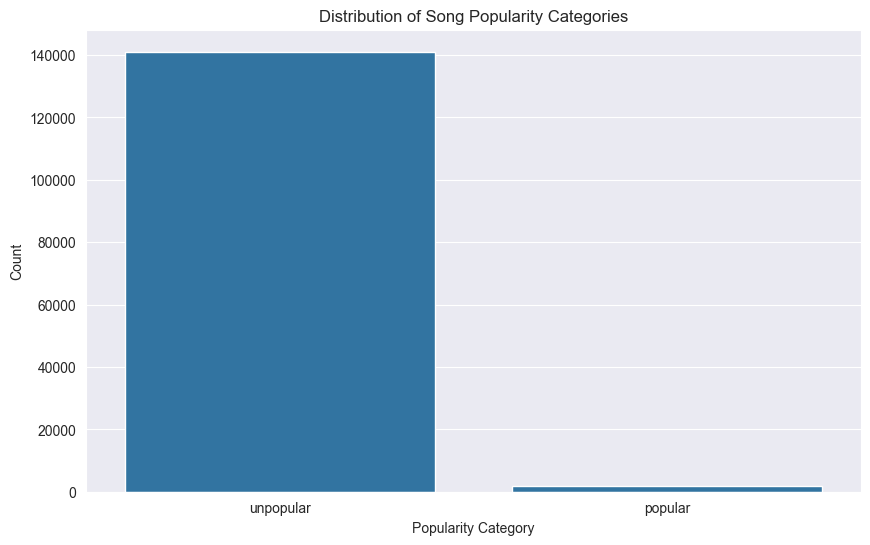

In [24]:
# Create popularity categories
Spotify['popularity_category'] = pd.cut(Spotify['popularity'],
                                      bins=[-float('inf'), 75, float('inf')],
                                      labels=['unpopular', 'popular'])

# Display the distribution of the categories
print("\nDistribution of popularity categories:")
print(Spotify['popularity_category'].value_counts())

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Spotify, x='popularity_category')
plt.title('Distribution of Song Popularity Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.show()

In [25]:
Spotify['Popularity_Label'] = np.where(Spotify['popularity'] > 75, 1, 0)

feature_cols = [
    'year',
    'instrumentalness',
    'liveness',
    'acousticness',
    'speechiness',
    'danceability',
    'mode',
    'loudness',
    'energy',
    'valence',
    'tempo'
]

X = Spotify[feature_cols]
y = Spotify['Popularity_Label']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20,
    stratify = y,
    random_state = 42
)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [29]:
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9873218225755612

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     28206
           1       0.26      0.02      0.04       347

    accuracy                           0.99     28553
   macro avg       0.62      0.51      0.52     28553
weighted avg       0.98      0.99      0.98     28553


Confusion Matrix: 
 [[28183    23]
 [  339     8]]


In [30]:
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc

print(f"Accuracy: {acc:.3f}")
print(f"Classification error: {error_rate:.3f}")

Accuracy: 0.987
Classification error: 0.013


In [31]:
# y_test and y_pred from your model
cm = confusion_matrix(y_test, y_pred)
# cm layout: [[TN, FP],
#             [FN, TP]]

cm_df = pd.DataFrame(
    cm,
    index=['Actual Unpopular (0)', 'Actual Popular (1)'],
    columns=['Predicted Unpopular (0)', 'Predicted Popular (1)']
)

print(cm_df)

                      Predicted Unpopular (0)  Predicted Popular (1)
Actual Unpopular (0)                    28183                     23
Actual Popular (1)                        339                      8


In [32]:
Spotify['Popularity_Label'] = np.where(Spotify['popularity'] > 50, 1, 0)

feature_cols = [
    'year',
    'instrumentalness',
    'liveness',
    'acousticness',
    'speechiness',
    'danceability',
    'mode',
    'loudness',
    'energy',
    'valence',
    'tempo'
]

X = Spotify[feature_cols]
y = Spotify['Popularity_Label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20,
    stratify = y,
    random_state = 42
)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [36]:
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8162714951143487

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88     21296
           1       0.67      0.55      0.60      7257

    accuracy                           0.82     28553
   macro avg       0.76      0.73      0.74     28553
weighted avg       0.81      0.82      0.81     28553


Confusion Matrix: 
 [[19326  1970]
 [ 3276  3981]]


In [37]:
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc

print(f"Accuracy: {acc:.3f}")
print(f"Classification error: {error_rate:.3f}")

Accuracy: 0.816
Classification error: 0.184


In [38]:
# y_test and y_pred from your model
cm = confusion_matrix(y_test, y_pred)
# cm layout: [[TN, FP],
#             [FN, TP]]

cm_df = pd.DataFrame(
    cm,
    index=['Actual Unpopular (0)', 'Actual Popular (1)'],
    columns=['Predicted Unpopular (0)', 'Predicted Popular (1)']
)

print(cm_df)

                      Predicted Unpopular (0)  Predicted Popular (1)
Actual Unpopular (0)                    19326                   1970
Actual Popular (1)                       3276                   3981



Distribution of popularity categories:
popularity_category
unpopular    106475
popular       36286
Name: count, dtype: int64


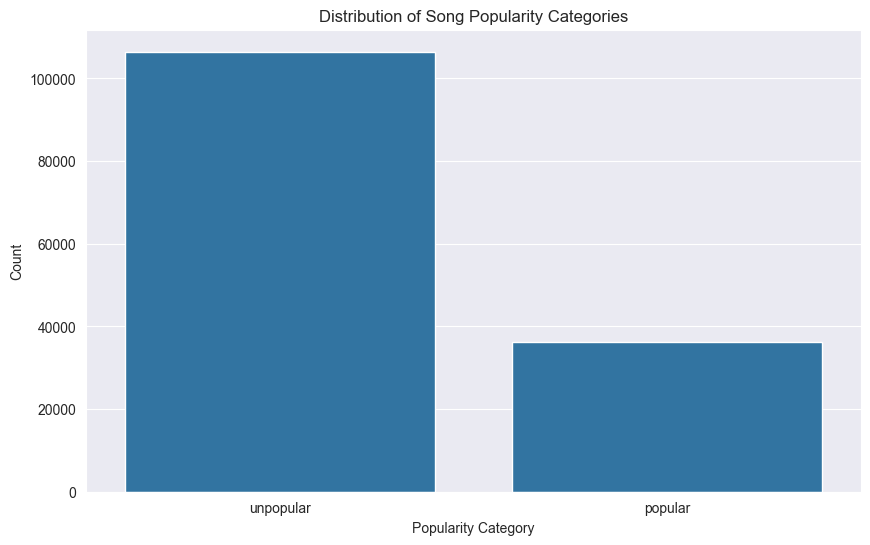

In [39]:
# Create popularity categories
Spotify['popularity_category'] = pd.cut(Spotify['popularity'],
                                      bins=[-float('inf'), 50, float('inf')],
                                      labels=['unpopular', 'popular'])

# Display the distribution of the categories
print("\nDistribution of popularity categories:")
print(Spotify['popularity_category'].value_counts())

# Create a bar plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=Spotify, x='popularity_category')
plt.title('Distribution of Song Popularity Categories')
plt.xlabel('Popularity Category')
plt.ylabel('Count')
plt.show()

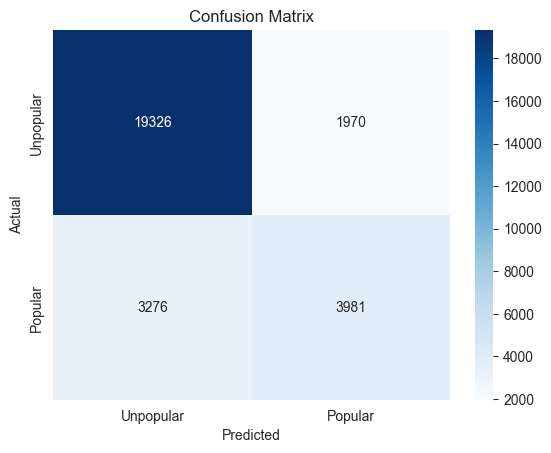

In [40]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unpopular', 'Popular'],
            yticklabels=['Unpopular', 'Popular'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

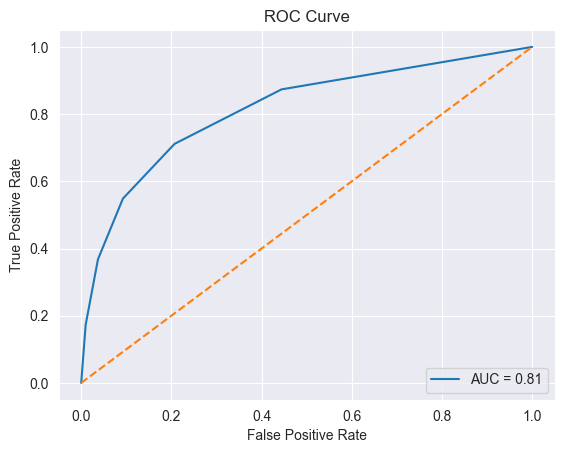

In [41]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the “popular” class
y_prob = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

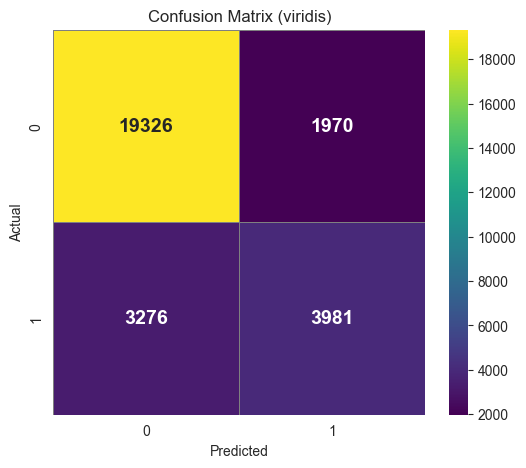

In [42]:
# assume y_test, y_pred are defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis',         # ← try 'viridis' for high-contrast perceptual colors
    cbar=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'size':14, 'weight':'bold'}
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (viridis)')
plt.show()

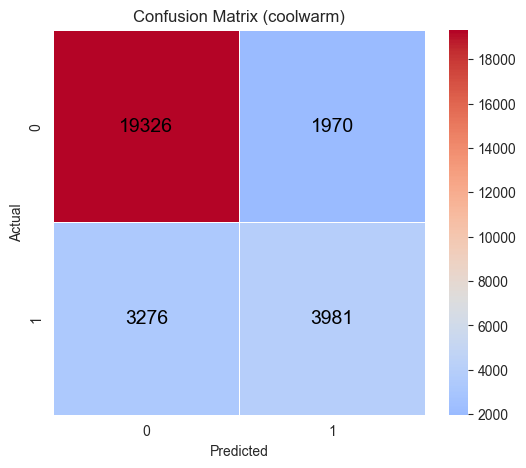

In [43]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='coolwarm',       # ← reds vs blues
    center=cm.mean(),      # center the colormap at the mean count
    linewidths=0.5,
    linecolor='white',
    annot_kws={'size':14, 'color':'black'}
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (coolwarm)')
plt.show()


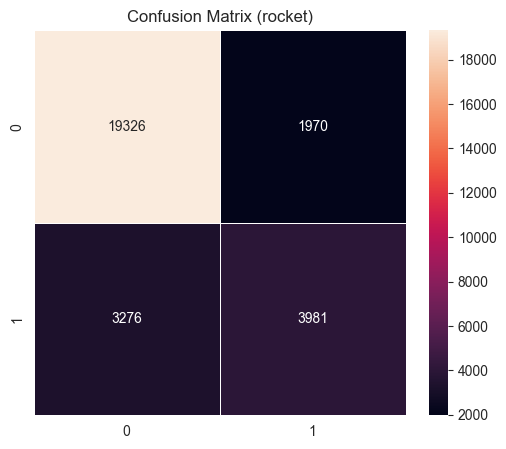

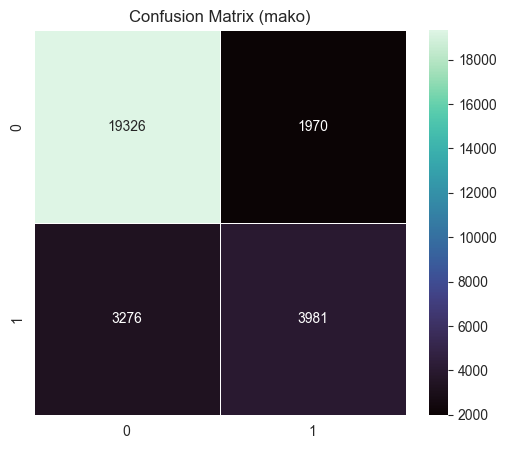

In [44]:
for pal in ['rocket', 'mako']:
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=pal,
                linewidths=0.5, linecolor='white')
    plt.title(f'Confusion Matrix ({pal})')
    plt.show()